ENDO-C1_v081_PRJ.ome.tiff
ENDO-C1_v082_PRJ.ome.tiff
ENDO-C1_v083_PRJ.ome.tiff
ENDO-C1_v084_PRJ.ome.tiff
ENDO-C1_v085_PRJ.ome.tiff
ENDO-C1_v086_PRJ.ome.tiff
ENDO-C1_v087_PRJ.ome.tiff
ENDO-C1_v088_PRJ.ome.tiff
ENDO-C1_v089_PRJ.ome.tiff
ENDO-C1_v090_PRJ.ome.tiff
ENDO-C1_v091_PRJ.ome.tiff
ENDO-C1_v092_PRJ.ome.tiff
ENDO-C1_v093_PRJ.ome.tiff
ENDO-C1_v094_PRJ.ome.tiff
ENDO-C1_v095_PRJ.ome.tiff
ENDO-C1_v096_PRJ.ome.tiff
ENDO-C1_v097_PRJ.ome.tiff
ENDO-C1_v098_PRJ.ome.tiff
ENDO-C1_v099_PRJ.ome.tiff
ENDO-C1_v100_PRJ.ome.tiff
ENDO-C1_v101_PRJ.ome.tiff
ENDO-C1_v102_PRJ.ome.tiff
ENDO-C1_v103_PRJ.ome.tiff
ENDO-C1_v104_PRJ.ome.tiff
ENDO-C1_v105_PRJ.ome.tiff
ENDO-C1_v106_PRJ.ome.tiff
ENDO-C1_v107_PRJ.ome.tiff
ENDO-C1_v108_PRJ.ome.tiff
ENDO-C1_v109_PRJ.ome.tiff
ENDO-C1_v110_PRJ.ome.tiff
ENDO-C1_v111_PRJ.ome.tiff
ENDO-C1_v112_PRJ.ome.tiff
ENDO-C1_v113_PRJ.ome.tiff
ENDO-C1_v114_PRJ.ome.tiff
ENDO-C1_v115_PRJ.ome.tiff
ENDO-C1_v116_PRJ.ome.tiff
ENDO-C1_v117_PRJ.ome.tiff
ENDO-C1_v118_PRJ.ome.tiff
ENDO-C1_v119

/home/jmamede/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log


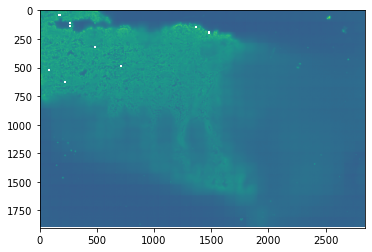

In [20]:
from ashlar import fileseries, thumbnail,reg
import matplotlib.pyplot as plt
from ashlar.scripts.ashlar import process_axis_flip
import numpy as np
import pims

c1r = fileseries.FileSeriesReader(
#     '/run/media/jmamede/Joao/multiplex/ENDO/img1/',
    '/home/jmamede/Data/multiplex/',
    pattern='ENDO-C1_v{series}_PRJ.ome.tiff',
    overlap=0.075,
    width=30,
    height=20,
    layout='snake',
    direction='horizontal',
    pixel_size=0.10833,
)

# check if filenames are indexed properly
print(
    '\n'.join(c1r.metadata.filename(i, 0) for i in range(80, 120))
)
# it's very likely you'll want `flip_x=False, flip_y=True`
# try not to tweak here for now
# process_axis_flip(c1r, flip_x=False, flip_y=False)


# If using the third channel, pass `channel=2` (0-based indexing in python)
thumbnail_c1r = thumbnail.make_thumbnail(c1r, channel=3)

plt.figure()
# doing log just for visualization
plt.imshow(np.log(thumbnail_c1r))
# process_axis_flip(c1r, flip_x=False, flip_y=True)

In [21]:
c1e = reg.EdgeAligner(c1r, channel=3, filter_sigma=1, verbose=True)
c1e.run()

    assembling thumbnail 600/600
    quantifying alignment error 1000/1000
    aligning edge 1150/1150


/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


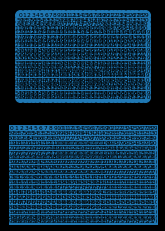

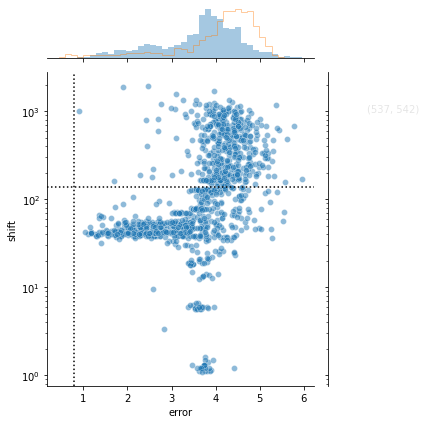

In [5]:
reg.plot_edge_quality(c1e, img=c1e.reader.thumbnail)
# plt.gca().suptitle('c1e')

# # plot_edge_scatter function requires seaborn
reg.plot_edge_scatter(c1e)
# plt.gca().suptitle('c1e')

In [26]:
mosaic_args = {}
#if args.output_channels:
# mosaic_args['channels'] = 4
#pyramid
mosaic_args['tile_size'] = 2048

# if args.quiet is False:
mosaic_args['verbose'] = True
# mosaic_args['flip_mosaic_x'] = False
# mosaic_args['flip_mosaic_y'] = False


In [ ]:
#filepath here:"C.ome.tif" is needed to call Mosaic but mode='return' shouldn't use it.
mosaic = reg.Mosaic(
        c1e, c1e.mosaic_shape,'C.ome.tif',**mosaic_args
    )
mosaic.run(mode='return')

    Channel 0:
        merging tile 600/600
    Channel 1:
        merging tile 600/600
    Channel 2:
        merging tile 437/600

In [10]:
# it's very likely you'll want `flip_x=False, flip_y=True`
# try not to tweak here for now
process_axis_flip(sc1r, flip_x=False, flip_y=False)
# If using the third channel, pass `channel=2` (0-based indexing in python)
thumbnail_c1r = thumbnail.make_thumbnail(c1r, channel=2)

    assembling thumbnail 170/170
